In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bmyrc_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Myrcene
0,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
3,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.484375
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74996,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74997,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.273438


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Beta-Myrcene', 'index'], axis = 1)
y = df_knn[['X..Beta-Myrcene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.484375 ],
       [0.484375 ],
       [0.484375 ],
       ...,
       [0.2734375],
       [0.2734375],
       [0.2734375]])

<AxesSubplot:ylabel='Count'>

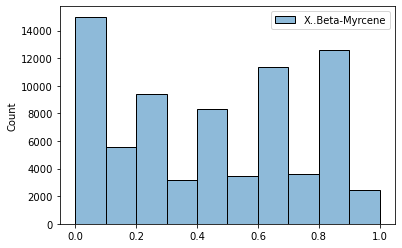

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.10067780691646318

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.027938598118362915

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1671484313966569

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8123124950898615

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.6749277887559488

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.21528209e-01, 1.25811959e-01, 1.16954913e-01, 1.11450938e-01,
       1.16351956e-01, 1.49996869e-03, 1.32845014e-02, 3.18174400e-02,
       8.51365641e-05, 2.39194385e-03, 5.48912744e-03, 2.12061694e-07,
       1.09486439e-02, 8.58904927e-05, 3.95694406e-03, 6.60170313e-03,
       9.19566783e-03, 8.01244145e-03, 2.76384105e-07, 1.09850453e-02,
       1.63106571e-06, 1.46197379e-06, 9.39126570e-03, 6.63540218e-03,
       1.35818086e-02, 3.23967818e-03, 9.17487431e-03, 8.91733531e-05,
       8.51380652e-07, 3.13692971e-03, 1.44636458e-02, 2.22598151e-07,
       1.32375216e-02, 0.00000000e+00, 0.00000000e+00, 9.05666194e-03,
       8.76539490e-03, 9.33937114e-03, 6.57096518e-04, 8.23309289e-04,
       9.84547586e-05, 7.16215034e-03, 2.88203537e-04, 1.52586849e-02,
       5.20111455e-04, 9.84699805e-03, 2.05205664e-03, 5.34214239e-04,
       7.83962023e-03, 3.63733934e-03, 1.60929172e-02, 1.11923046e-02,
       4.52112487e-03, 4.35580881e-03, 4.25463145e-03, 4.81698343e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,sativa,happy,relaxed,sleepy,blueberry,diesel,mint,sweet
0,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,1,0,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
3,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,0,1,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0,0,0,0
74996,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0
74997,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,1,0,1,1,1,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'sativa',
 'happy',
 'relaxed',
 'sleepy',
 'blueberry',
 'diesel',
 'mint',
 'sweet']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_bmyrc.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_bmyrc.pkl")

['selector_knn_lsa_elbow_bmyrc.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.10190432827444548

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.02773886388515533

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16654988407427768

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8098002204116406

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.6772742942973845

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.041872172740307835

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11599510784355856

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9827339956791021

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8434603942569704

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_bmyrc.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_bmyrc.pkl")

['y_test_knreg_lsa_elbow_bmyrc.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.04255881357812812

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.013736390941551

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11720235040966968

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8382973861215061

In [65]:
y_test

,X..Beta-Myrcene
11591,0.691406
52020,0.242188
34666,0.624479
22169,0.812500
23049,0.812500
...,...
60863,0.171875
32316,0.406250
60933,0.171875
43206,0.656250


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

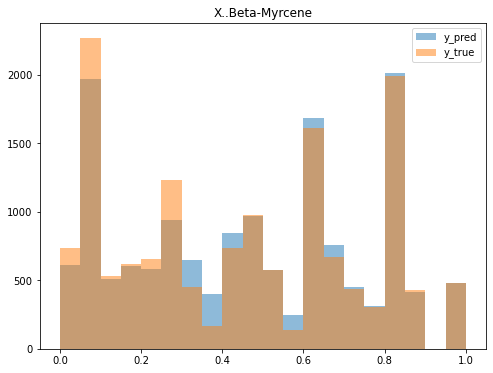

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_bmyrc.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.919
P-value: 0.000


<AxesSubplot:>

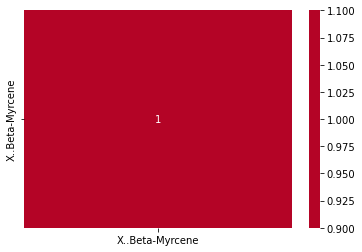

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)